In [1]:
#import libary
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
capture = cv2.VideoCapture(0)

time.sleep(1)
count = 0

# chứa giá trị của ảnh nền
background = 0

# mở webcame và thu nhận hình ảnh trong 60 giây
for i in range(60):
    return_val, background = capture.read()
    if return_val == False:
        continue

#lật ảnh
background = np.flip(background, axis = 1)

while True:
    return_val, img = capture.read()
    if not return_val:
        break
    count = count + 1
    img = np.flip(img, axis = 1)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #mask1
    lower_red = np.array([100, 40, 40])        
    upper_red = np.array([100, 255, 255]) 
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    
    #mask2
    lower_red = np.array([155, 40, 40]) 
    upper_red = np.array([180, 255, 255]) 
    mask2 = cv2.inRange(hsv, lower_red, upper_red) 
    
    mask1 = mask1 + mask2
    
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, np.ones((3, 3), 
                                         np.uint8), iterations = 2) 
    mask1 = cv2.dilate(mask1, np.ones((3, 3), np.uint8), iterations = 1) 
    mask2 = cv2.bitwise_not(mask1) 
    
    res1 = cv2.bitwise_and(background, background, mask = mask1) 
    res2 = cv2.bitwise_and(img, img, mask = mask2) 
    final_output = cv2.addWeighted(res1, 1, res2, 1, 0)
    
    cv2.imshow("Webcame", final_output) 
    k = cv2.waitKey(10) 
    if k == 27: 
        break
capture.release()
cv2.destroyAllWindows()

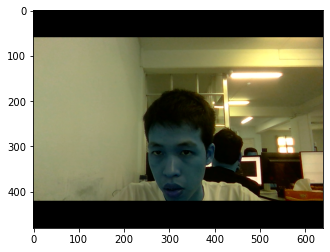

In [11]:
plt.imshow(background)
plt.show()